# 1. Business Problem

<h1>Goal: </h1>

# 1.Data collection

In [68]:
import pandas as pd 
import numpy as np 
df= pd.read_csv("HR_DT.csv")

In [69]:
df.sample(4)

,Position of the employee,no of Years of Experience of employee,monthly income of employee
16,Senior Consultant,5.1,66029
145,CEO,9.0,105582
174,Senior Partner,8.7,109431
136,CEO,5.1,66029


In [70]:
df.shape

(196, 3)

In [71]:
# regulartion using 

In [72]:
set(df['Position of the employee'])

{'Business Analyst',
 'C-level',
 'CEO',
 'Country Manager',
 'Junior Consultant',
 'Manager',
 'Partner',
 'Region Manager',
 'Senior Consultant',
 'Senior Partner'}

In [73]:
df['Position of the employee'].value_counts()

Position of the employee
Partner              28
Senior Partner       25
C-level              24
Region Manager       23
CEO                  23
Country Manager      18
Manager              17
Senior Consultant    16
Junior Consultant    14
Business Analyst      8
Name: count, dtype: int64

In [74]:
df.describe()

,no of Years of Experience of employee,monthly income of employee
count,196.000000,196.000000
mean,5.112245,74194.923469
std,2.783993,26731.578387
min,1.000000,37731.000000
25%,3.000000,56430.000000
50%,4.100000,63831.500000
75%,7.100000,98273.000000
max,10.500000,122391.000000


In [75]:
df.shape

(196, 3)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Position of the employee               196 non-null    object 
 1   no of Years of Experience of employee  196 non-null    float64
 2    monthly income of employee            196 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.7+ KB


In [77]:
df.isnull().sum()

Position of the employee                 0
no of Years of Experience of employee    0
 monthly income of employee              0
dtype: int64

In [78]:
df.duplicated().sum()

38

In [79]:
# duplcate data is present in given data 
df=df.drop_duplicates()

In [80]:
df.duplicated().sum()

0

In [81]:
df.shape

(158, 3)

# EDA 

In [82]:
df['Position of the employee'].value_counts()

Position of the employee
Partner              20
Region Manager       19
Senior Partner       19
C-level              19
CEO                  16
Manager              15
Country Manager      15
Senior Consultant    14
Junior Consultant    13
Business Analyst      8
Name: count, dtype: int64

<Axes: xlabel='Position of the employee'>

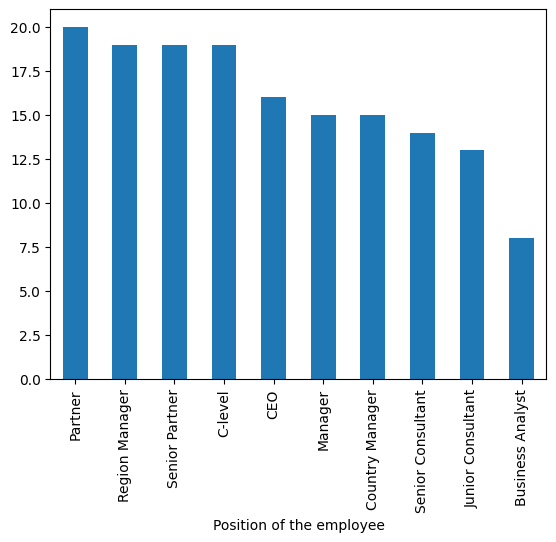

In [83]:
df['Position of the employee'].value_counts().plot(kind='bar')

C:\Users\raj\AppData\Local\Temp\ipykernel_5352\3311534558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[' monthly income of employee'])


<Axes: xlabel=' monthly income of employee', ylabel='Density'>

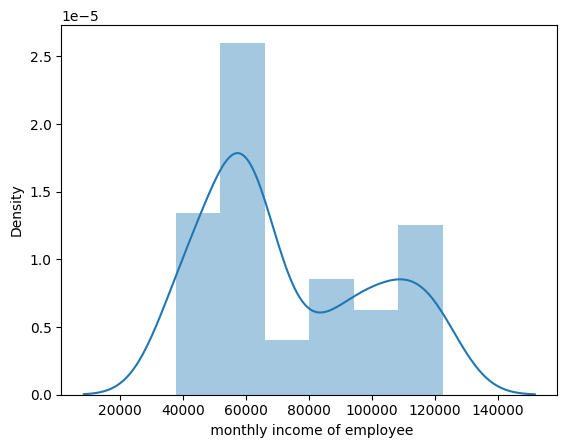

In [84]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.distplot(df[' monthly income of employee'])

# preprosecing of data 


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 0 to 195
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Position of the employee               158 non-null    object 
 1   no of Years of Experience of employee  158 non-null    float64
 2    monthly income of employee            158 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.9+ KB


In [86]:
# one hot incoder 


In [87]:
from sklearn.preprocessing import OneHotEncoder 
one =OneHotEncoder()

In [88]:
m=pd.get_dummies(df['Position of the employee'],dtype=int)

In [89]:
df.shape

(158, 3)

In [90]:
m.shape

(158, 10)

In [91]:
combined_columns = pd.concat([df,m], axis=1)

In [92]:
combined_columns.sample(3)

,Position of the employee,no of Years of Experience of employee,monthly income of employee,Business Analyst,C-level,CEO,Country Manager,Junior Consultant,Manager,Partner,Region Manager,Senior Consultant,Senior Partner
190,Country Manager,3.7,63218,0,0,0,1,0,0,0,0,0,0
4,Country Manager,2.2,39891,0,0,0,1,0,0,0,0,0,0
162,C-level,4.0,56957,0,1,0,0,0,0,0,0,0,0


In [93]:
combined_columns.shape

(158, 13)

In [94]:
combined_columns.isnull().sum()

Position of the employee                 0
no of Years of Experience of employee    0
 monthly income of employee              0
Business Analyst                         0
C-level                                  0
CEO                                      0
Country Manager                          0
Junior Consultant                        0
Manager                                  0
Partner                                  0
Region Manager                           0
Senior Consultant                        0
Senior Partner                           0
dtype: int64

In [95]:
# standigintion 

In [96]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
min=MinMaxScaler()

In [97]:
#min.fit_transform(combined_columns['S'] no need 

# split the data 

In [98]:
X=combined_columns.iloc[:,[1,3,4,5,6,7,8,9,10,11,12]]
y=combined_columns[' monthly income of employee']
X.shape

(158, 11)

In [99]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Model selection 

In [100]:
from sklearn.ensemble import RandomForestRegressor 
reg1=RandomForestRegressor() 

In [101]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso 

In [102]:
d_reg=DecisionTreeRegressor()
li_reg=LinearRegression()
las_reg =Lasso()

In [103]:
reg1.fit(X_train,y_train)


RandomForestRegressor()

In [104]:
y_pre1=reg1.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error
r2_score(y_test,y_pre1)

0.9891084620210939

In [105]:
mean_absolute_error(y_test,y_pre1)

2138.1323058035714

In [106]:
d_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [107]:
y_pre2=d_reg.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error
r2_score(y_test,y_pre2)

0.9803170435218695

In [108]:
li_reg.fit(X_train,y_train)

LinearRegression()

In [109]:
y_pre3=li_reg.predict(X_test)
r2_score(y_test,y_pre3)

0.9549679212892357

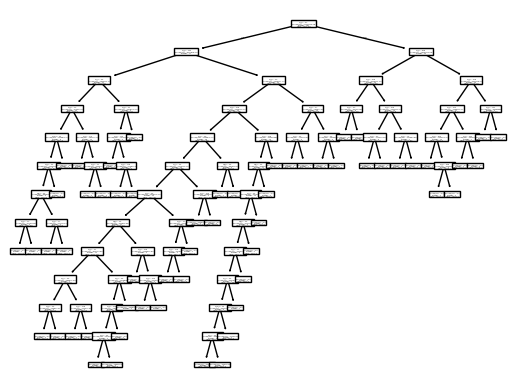

In [111]:
from sklearn.tree import plot_tree 
plot_tree(d_reg)
plt.show()

In [112]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)

In [114]:
X_train_trf=pd.DataFrame(pca.fit_transform(X_train))
X_test_trf =pd.DataFrame(pca.fit_transform(X_test))  
d_reg.fit(X_train_trf,y_train)

DecisionTreeRegressor()

In [116]:
y_pre3=d_reg.predict(X_test_trf)
r2_score(y_test,y_pre3)

0.9489226028695483